In [1]:
import os, glob, json, cv2, shutil, tqdm
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image
from collections import Counter

In [2]:
site_path = 'yolov5-master/data/test/site2/'
fire_path = '/media/data1/jaeju/aihub/fire-extracted/Class_04_02_poly_fire_resize/N1453/'
# equips = np.array(sorted([y for x in os.walk(path+'equip') for y in glob.glob(os.path.join(x[0], '*.jpg'))]))
# fires  = np.array(sorted([y for x in os.walk(path+'fire-extracted') for y in glob.glob(os.path.join(x[0], '*.png'))]))
# cracks  = np.array(sorted([y for x in os.walk(path+'crack') for y in glob.glob(os.path.join(x[0], '*.png'))]))

sites = np.array([y for x in os.walk(site_path) for y in glob.glob(os.path.join(x[0], '*.jpg'))])
fires = np.array([y for x in os.walk(fire_path) for y in glob.glob(os.path.join(x[0], '*.png'))])

### 1. 공사현장 이미지에 Fire 사진 넣기

In [4]:
meta = [each.split('/')[-1].split('.')[0].split('M')[-1] for each in sites]
sorted_idx = np.argsort(meta)
sorted_sites = np.array(sites)[sorted_idx]

meta = [each.split('/')[-1].split('.')[0].split('M')[-1] for each in fires]
sorted_idx = np.argsort(meta)
sorted_fires = np.array(fires)[sorted_idx]

0.7172774869109948

In [21]:
for frame_idx, each_frame in tqdm.tqdm(enumerate(sorted_sites), total=len(sites)):
    
    # 2. Selecting Random Fire Image
    target_fire = cv2.imread(sorted_fires[frame_idx])
    target_fire = cv2.cvtColor(target_fire, cv2.COLOR_BGR2RGB)
    tw, th = int((80 + 80 * 1/(len(sites)/(frame_idx+1)))), int((40 + 40 * 1/(len(sites)/(frame_idx+1)))) #target_fire.shape[0], target_fire.shape[1]
    resized = cv2.resize(target_fire, dsize=(th, tw), interpolation=cv2.INTER_AREA)

    crack2gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(crack2gray, 150, 200, cv2.THRESH_BINARY)
    mask_inv  = cv2.bitwise_not(mask) - 55
    
    # 3. Load target-frame
    target_frame = cv2.imread(each_frame)
    target_frame = cv2.cvtColor(target_frame, cv2.COLOR_BGR2RGB)

    # 3-2. Crack 들어갈 위치
    pw = 800
    ph = 1850
    roi = target_frame[pw:pw+tw, ph:ph+th]

    # 3-3. Crack 들어갈 부분 채우기
    fire_back  = cv2.bitwise_and(roi, roi, mask=mask_inv)
    fire_fig   = cv2.bitwise_and(resized, resized, mask=mask)
    final      = cv2.add(fire_back, fire_fig)

    # 4. Insert Fire into target-frame
    target_frame[pw:tw+pw, ph:th+ph] = final

    
    target_path = 'yolov5-master/data/test/all-in-one2/'
    os.makedirs(target_path, exist_ok=True) 

    filename = each_frame.split('/')[-1][:-4]
    cv2.imwrite(f'{target_path}/{filename}.png', cv2.cvtColor(target_frame, cv2.COLOR_RGB2BGR))
    #shutil.copyfile(each_frame, f'{target_path}/{filename}.png')


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 444/573 [00:52<00:15,  8.45it/s]


error: OpenCV(4.5.4-dev) /tmp/pip-req-build-v2fnlv3a/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


### -. Visualization

{'data ID': 'S2', 'middle classification': '07', 'flags': {}, 'box': [1095, 364, 910, 795], 'class': '44'}
{'data ID': 'S2', 'middle classification': '07', 'flags': {}, 'box': [1389, 384, 1143, 815], 'class': '44'}


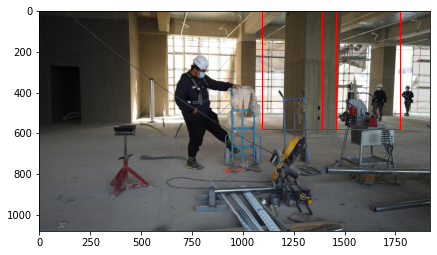

In [82]:
with open(sample_json, "r") as st_json:
    data = json.load(st_json)

fig, ax = plt.subplots(figsize=(7, 10))

ax.imshow(Image.open(sample_image))

for each in data['annotations']:
    print(each)
    # print(each['box'])
    x1 = int(each['box'][0])
    x2 = int(each['box'][1])
    w  = int(each['box'][2])
    h  = int(each['box'][3])

    rect = patches.Rectangle((x1, y1), x2, y2, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()